# Logistics Regression with SKLearn

https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc


In [1]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [2]:

    

import requests
import io
url="https://manmohan291.s3.ap-south-1.amazonaws.com/ClassificationDS/ClassificationData.csv"
s=requests.get(url).content
dfTrain=pd.read_csv(io.StringIO(s.decode('utf-8')))

dfTrain.head()

,X1,X2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Dataset ##

In [3]:

X=dfTrain.values[:,:-1]
Y=dfTrain.values[:,-1:]


### Visualize the dataset

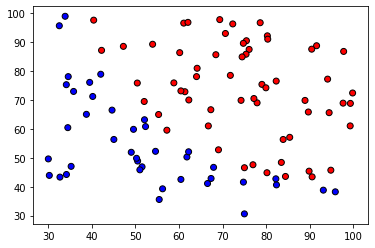

In [4]:
# Visualize the data:
from matplotlib.colors import ListedColormap
myColorMap = ListedColormap(['blue', 'red'])                    


plt.scatter(X[:,0].flatten(),X[:,1].flatten(), c=Y.flatten(),  cmap=myColorMap,edgecolor='k');
plt.show()

## Simple Logistic Regression

In [5]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegression();
clf.fit(X, Y.flatten());

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Plot the decision boundary

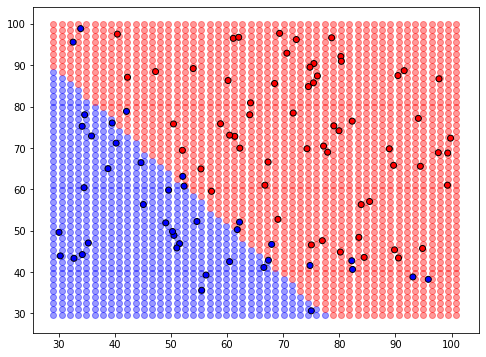

In [6]:
plt.figure(figsize=(8,6))
# Set min and max values and give it some padding
x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1

xx1 =np.linspace(x1_min, x1_max, 50)
xx2 =np.linspace(x2_min, x2_max, 50)
#Plot Prediction Data
for i in range(len(xx1)):
    for j in range(len(xx2)):
        newX=(np.column_stack((xx1[i],xx2[j])))
        newY=clf.predict(newX)
        yColor=myColorMap(newY)
     
        plt.scatter(xx1[i].flatten(),xx2[j].flatten(),color=yColor,alpha=0.4);

#Plot Training data
plt.scatter(X[:,0].flatten(),X[:,1].flatten(), c=Y.flatten(),  cmap=myColorMap,edgecolor='k');
plt.show()